In [25]:
import pandas as pd
import random
data = pd.read_csv('Data/newboard.csv')
class Tile:
    def __init__(self, attributes):
        if attributes['Color'] == 'None':
            self.group = attributes['Space']
        else:
            self.group = attributes['Color']
        self.n = 0
        self.position = [attributes['Position(X)'], attributes['Position(Y)']]
        self.name = attributes['Name']
        self.rent = attributes['RentBuild5']
        
    def landOn(self):
        self.n += 1
    def rentEx(self, odds):
        return self.rent * odds

In [26]:
board = [[], [], [], []]
for index,row in data.iterrows():
    side = index // 10
    attributes = dict(row)
    tile = Tile(attributes)
    board[side].append(tile)

In [27]:
class Player:
    def __init__(self):
        self.position = [0,0]
        self.movecount = 0
    def move(self):
        self.rollDice()
        
        if(self.position[0]  + int((self.movecount + self.position[1]) / 10) > 3):
            self.position[0] = self.position[0] + int((self.movecount + self.position[1]) / 10) - 4
            self.position[1] = (self.position[1] + self.movecount) % 10
            
        else:
            self.position[0] = int((self.movecount + self.position[1]) / 10) + self.position[0]
            self.position[1] = (self.position[1] + self.movecount) % 10
    def rollDice(self):
        dice1 = random.randint(1,6)
        dice2 = random.randint(1,6)
        self.movecount = dice1+dice2

In [28]:
player = Player()
for i in range(0, 10000000):
    player.move()
    board[player.position[0]][player.position[1]].landOn()

In [29]:
results = {}
tiles = []
for i in board:
    for j in i:
        results[j] = j.n
        tiles.append(j)

In [30]:
group = []
value = []
for i in results.keys():
    group.append(i.group)
    value.append(i.n / 10000000)


<BarContainer object of 40 artists>

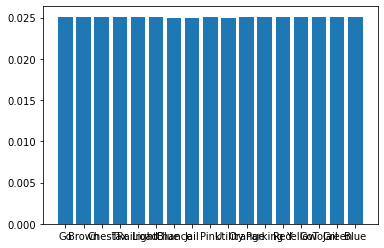

In [31]:
import matplotlib.pyplot as plt
plt.bar(group, value)

In [32]:
exRent = dict()
for i, tile in enumerate(group):
    if tile not in exRent.keys():
        exRent[tile] = [tiles[i].rentEx(value[i])]
    else:
        exRent[tile].append(tiles[i].rentEx(value[i]))

In [34]:
values = []
names = []
for i in exRent.keys():
    values.append(sum(exRent[i]))
    names.append(i)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

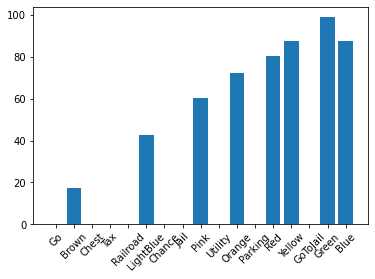

In [36]:
plt.bar(names, values)
plt.xticks(rotation = 45)
 